# Image_Classification(cat, dog)

This notebook based on Deep Learing/CNN.

A **Convolutional Neural Network(CNN)** is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a Cnn is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, Cnn have the ability to learn these filters/characteristics.

### Import Libraries & Layers

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense  #droput is used for prevention of overfitting, flatten convert into single array
import numpy as np
from keras.preprocessing import image
from keras import backend as K
import os
import matplotlib.pyplot as plt

### Datasets

In [2]:
train_data_dir='train' #Path
test_data_dir='test' #Path

Datasets contains set of images of cats & dogs.

### Define dimensions of images

In [3]:
 # dimension of our images
    
img_width, img_height=150, 150
nb_train_samples=1000
nb_test_samples=100
epochs=35   #no of times you will sent batch of data  here we give 20 images to neural network 50 times
batch_size=20 #no of images you are giving at one point of time

In [4]:
if K.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width, img_height,3) #150,150,3

train_datagen= ImageDataGenerator(
    rescale=1. /255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)    



In [5]:
#for test data
test_datagen= ImageDataGenerator(rescale=1. /255)


train_generator= train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')


test_generator= test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 10174 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
#implementig a neural network

model= Sequential()

model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()
          
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))  #dense give you a hidden layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


we create a sequential model.

Here's the complete architecture of our model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

### Compile and train the model

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

**We pass parameters to the model.compile() command**

**Loss [‘binary_crossentropy’]**: We specify a loss function that our optimizer will minimize. In this case, since we’re working with a two-class problem, we use binary cross-entropy loss.
    
**Optimizer**: rmsprop

In [9]:
#training part

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples)
    
model.save_weights('model.h5')

Epoch 1/50
1000/1000 [==============================] - 364s 364ms/step - loss: 0.6472 - acc: 0.6365 - val_loss: 0.5517 - val_acc: 0.7220
Epoch 2/50
1000/1000 [==============================] - 356s 356ms/step - loss: 0.5621 - acc: 0.7189 - val_loss: 0.5056 - val_acc: 0.7615
Epoch 3/50
1000/1000 [==============================] - 310s 310ms/step - loss: 0.5188 - acc: 0.7541 - val_loss: 0.4744 - val_acc: 0.7852
Epoch 4/50
1000/1000 [==============================] - 221s 221ms/step - loss: 0.4926 - acc: 0.7716 - val_loss: 0.4568 - val_acc: 0.7968
Epoch 5/50
1000/1000 [==============================] - 220s 220ms/step - loss: 0.4732 - acc: 0.7851 - val_loss: 0.4438 - val_acc: 0.7993
Epoch 6/50
1000/1000 [==============================] - 241s 241ms/step - loss: 0.4622 - acc: 0.7912 - val_loss: 0.4170 - val_acc: 0.8180
Epoch 7/50
1000/1000 [==============================] - 276s 276ms/step - loss: 0.4426 - acc: 0.8058 - val_loss: 0.4510 - val_acc: 0.7847
Epoch 8/50
1000/1000 [============

### Making New Predictions

In [9]:
import cv2

In [10]:
test_img = cv2.imread("./test/dog/dog.5.JPG")

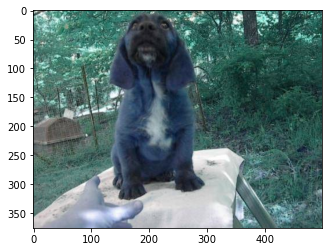

In [11]:
plt.imshow(test_img)

In [12]:
test_img.shape

(376, 499, 3)

In [13]:
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))

In [14]:
model.predict(test_input)

1/1 [==============================] - 0s 291ms/step


array([[4.1734243e-09]], dtype=float32)

###### correct prediction made 

 Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule. I used simple **Convolutional Neural Network** and the accuracy i got is **81%**.